In [5]:
#import Necessaty Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import string  
import spacy 
import nltk
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load the data
reviews_data = pd.read_excel('/content/hotel_reviews (1).xlsx')

In [7]:
reviews_data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
5,love monaco staff husband stayed hotel crazy w...,5.0
6,"cozy stay rainy city, husband spent 7 nights m...",5.0
7,"excellent staff, housekeeping quality hotel ch...",4.0
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0
9,excellent stayed hotel monaco past w/e delight...,5.0


# EDA

In [8]:
reviews_data.shape

(20491, 2)

In [9]:
reviews_data.columns

Index(['Review', 'Rating'], dtype='object')

In [10]:
reviews_data.isna().sum()

Review    0
Rating    0
dtype: int64

In [11]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [12]:
reviews_data['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
reviews_data['num_characters'] = reviews_data['Review'].apply(len)

In [15]:
# num of words
reviews_data['num_words'] = reviews_data['Review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
reviews_data['num_sentences'] = reviews_data['Review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
reviews_data.head()

,Review,Rating,num_characters,num_words,num_sentences
0,nice hotel expensive parking got good deal sta...,4.0,593,98,1
1,ok nothing special charge diamond member hilto...,2.0,1689,270,1
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,236,2
3,"unique, great stay, wonderful time hotel monac...",5.0,600,102,1
4,"great stay great stay, went seahawk game aweso...",5.0,1281,224,1


# Visualization

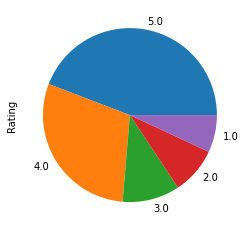

In [18]:
reviews_data['Rating'].value_counts().plot.pie()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc091ff7130>,
      dtype=object)

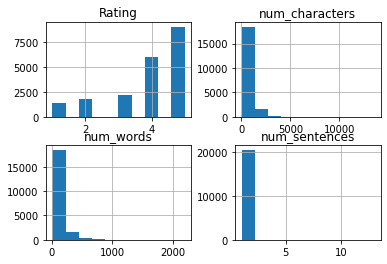

In [19]:
reviews_data.hist()

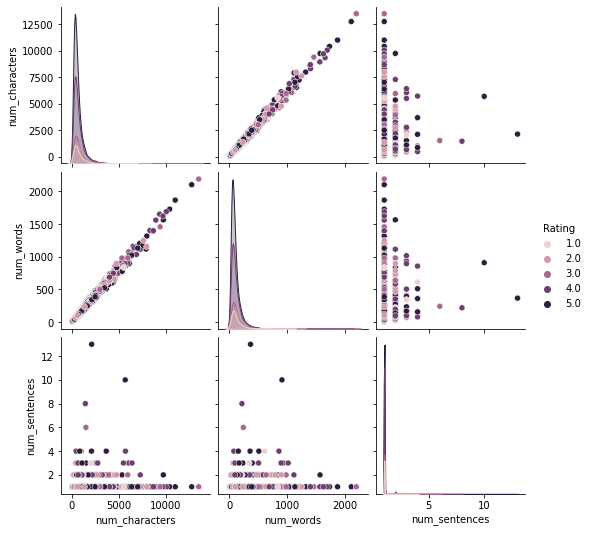

In [20]:
sns.pairplot(reviews_data,hue='Rating')

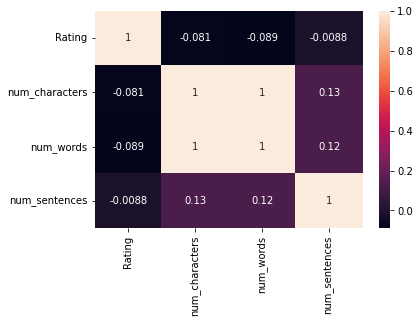

In [21]:
sns.heatmap(reviews_data.corr(),annot=True)

# Preprocessing Data

In [22]:
reviews_data

,Review,Rating,num_characters,num_words,num_sentences
0,nice hotel expensive parking got good deal sta...,4.0,593,98,1
1,ok nothing special charge diamond member hilto...,2.0,1689,270,1
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,236,2
3,"unique, great stay, wonderful time hotel monac...",5.0,600,102,1
4,"great stay great stay, went seahawk game aweso...",5.0,1281,224,1
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733,121,1
20487,great location price view hotel great quick pl...,4.0,306,40,1
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,70,1
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,836,1


In [23]:
# creating new csv file
reviews_data.to_csv('reviews.csv',encoding = 'utf-8',index = True)

In [24]:
review_content = pd.read_csv('reviews.csv',encoding = 'utf-8')
review_content

,Unnamed: 0,Review,Rating,num_characters,num_words,num_sentences
0,0,nice hotel expensive parking got good deal sta...,4.0,593,98,1
1,1,ok nothing special charge diamond member hilto...,2.0,1689,270,1
2,2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,236,2
3,3,"unique, great stay, wonderful time hotel monac...",5.0,600,102,1
4,4,"great stay great stay, went seahawk game aweso...",5.0,1281,224,1
...,...,...,...,...,...,...
20486,20486,"best kept secret 3rd time staying charm, not 5...",5.0,733,121,1
20487,20487,great location price view hotel great quick pl...,4.0,306,40,1
20488,20488,"ok just looks nice modern outside, desk staff ...",2.0,443,70,1
20489,20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,836,1


In [25]:
review_content.drop('Unnamed: 0',axis=1,inplace=True)

In [26]:
review_content.head()

,Review,Rating,num_characters,num_words,num_sentences
0,nice hotel expensive parking got good deal sta...,4.0,593,98,1
1,ok nothing special charge diamond member hilto...,2.0,1689,270,1
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,236,2
3,"unique, great stay, wonderful time hotel monac...",5.0,600,102,1
4,"great stay great stay, went seahawk game aweso...",5.0,1281,224,1


In [27]:
review_content.shape

(20491, 5)

# Text Cleaning

In [28]:
import re
import string
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer= WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

In [30]:
def lemmatise(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)


In [31]:
review_content['cleaned_review']=review_content['Review'].apply(lambda x :preprocess(x))
review_content['cleaned_review']

0        nice hotel expensive parking got good deal sta...
1        nothing special charge diamond member hilton d...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time staying charm star beat ...
20487    great location price view hotel great quick pl...
20488    look nice modern outside desk staff particular...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking believe excellent rating hotel ...
Name: cleaned_review, Length: 20491, dtype: object

In [32]:
tokenizer = RegexpTokenizer(r'\w+')
review_content['lemmatized_content']=review_content['cleaned_review'].map(lambda x : tokenizer.tokenize(lemmatise(x)))
review_content['lemmatized_content']

0        [nice, hotel, expensive, parking, got, good, d...
1        [nothing, special, charge, diamond, member, hi...
2        [nice, room, experience, hotel, monaco, seattl...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, staying, charm, sta...
20487    [great, location, price, view, hotel, great, q...
20488    [look, nice, modern, outside, desk, staff, par...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, believe, excellent, rating, ...
Name: lemmatized_content, Length: 20491, dtype: object

In [33]:
review_content.head()

,Review,Rating,num_characters,num_words,num_sentences,cleaned_review,lemmatized_content
0,nice hotel expensive parking got good deal sta...,4.0,593,98,1,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2.0,1689,270,1,nothing special charge diamond member hilton d...,"[nothing, special, charge, diamond, member, hi..."
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,236,2,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl..."
3,"unique, great stay, wonderful time hotel monac...",5.0,600,102,1,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5.0,1281,224,1,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."


# Data Analysis

In [34]:
from textblob import TextBlob
import matplotlib.pyplot  as plt
import seaborn as sns

In [35]:
review_content['sentiment']=review_content['cleaned_review'].apply(lambda x : TextBlob(x).sentiment.polarity)
review_content

,Review,Rating,num_characters,num_words,num_sentences,cleaned_review,lemmatized_content,sentiment
0,nice hotel expensive parking got good deal sta...,4.0,593,98,1,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...",0.208744
1,ok nothing special charge diamond member hilto...,2.0,1689,270,1,nothing special charge diamond member hilton d...,"[nothing, special, charge, diamond, member, hi...",0.238948
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,236,2,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl...",0.266138
3,"unique, great stay, wonderful time hotel monac...",5.0,600,102,1,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...",0.504825
4,"great stay great stay, went seahawk game aweso...",5.0,1281,224,1,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...",0.469643
...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733,121,1,best kept secret time staying charm star beat ...,"[best, kept, secret, time, staying, charm, sta...",0.209229
20487,great location price view hotel great quick pl...,4.0,306,40,1,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...",0.463333
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,70,1,look nice modern outside desk staff particular...,"[look, nice, modern, outside, desk, staff, par...",0.145929
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,836,1,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...",0.145881


In [36]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [37]:
review_content['review_segment']=review_content['sentiment'].apply(assign_Result)
review_content.head()

,Review,Rating,num_characters,num_words,num_sentences,cleaned_review,lemmatized_content,sentiment,review_segment
0,nice hotel expensive parking got good deal sta...,4.0,593,98,1,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...",0.208744,positive
1,ok nothing special charge diamond member hilto...,2.0,1689,270,1,nothing special charge diamond member hilton d...,"[nothing, special, charge, diamond, member, hi...",0.238948,positive
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,236,2,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl...",0.266138,positive
3,"unique, great stay, wonderful time hotel monac...",5.0,600,102,1,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...",0.504825,positive
4,"great stay great stay, went seahawk game aweso...",5.0,1281,224,1,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...",0.469643,positive


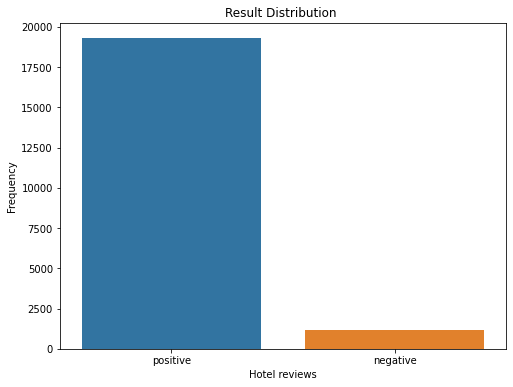

In [38]:
from six import text_type
x=review_content['review_segment'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hotel reviews', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

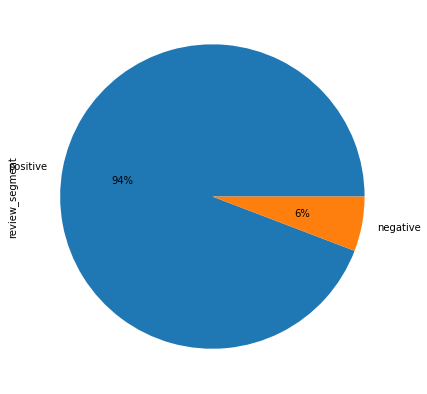

In [39]:
plt.figure(figsize=(10,7))
review_content['review_segment'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

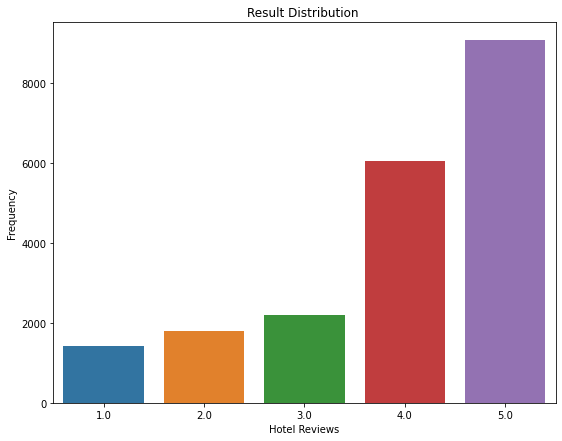

In [40]:
x=review_content['Rating'].value_counts()
plt.figure(figsize=(9,7))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hotel Reviews', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

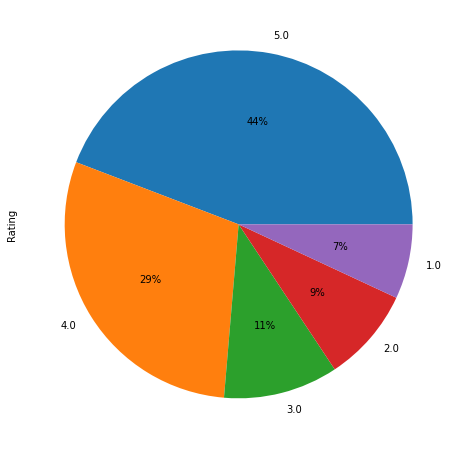

In [41]:
plt.figure(figsize=(10,8))
review_content['Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [42]:
# most common words
tokenizer = RegexpTokenizer(r'\w+')
review_content['word_count'] = review_content['cleaned_review'].apply(lambda x: len(str(x).split()))
review_content['result_len'] = review_content['cleaned_review'].astype(str).apply(len)
review_content['result_len']

0         543
1        1539
2        1264
3         557
4        1150
         ... 
20486     666
20487     294
20488     406
20489    5157
20490     565
Name: result_len, Length: 20491, dtype: int64

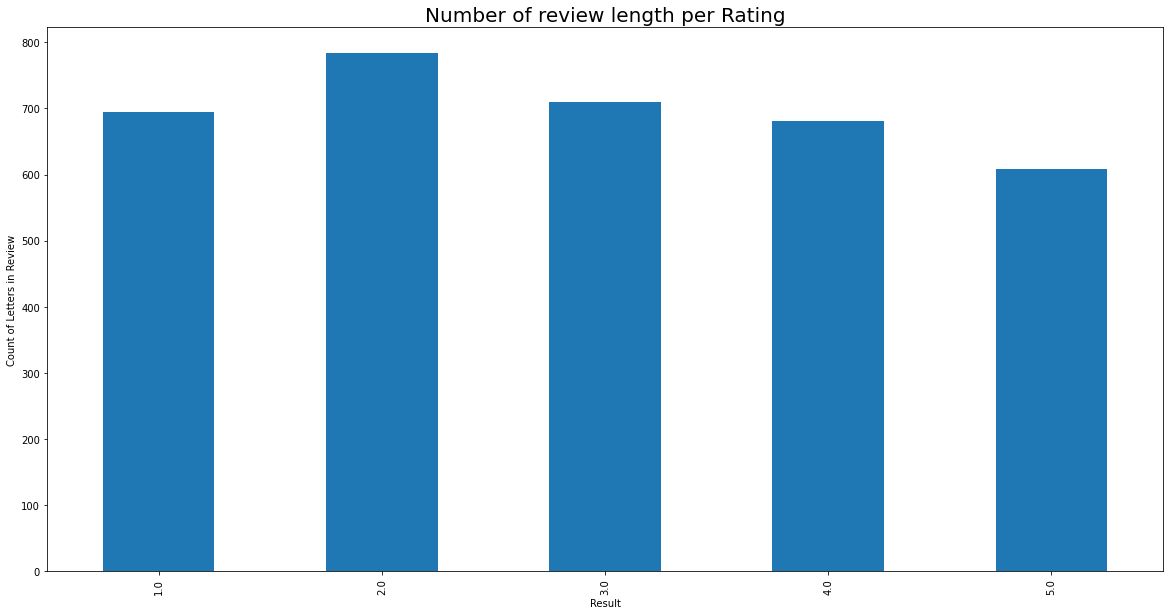

In [43]:
review_content.groupby('Rating')['result_len'].mean().plot(kind='bar',figsize=(20,10))
plt.xlabel('Result')
plt.ylabel('Count of Letters in Review')
plt.title('Number of review length per Rating', fontsize=20)
plt.show()

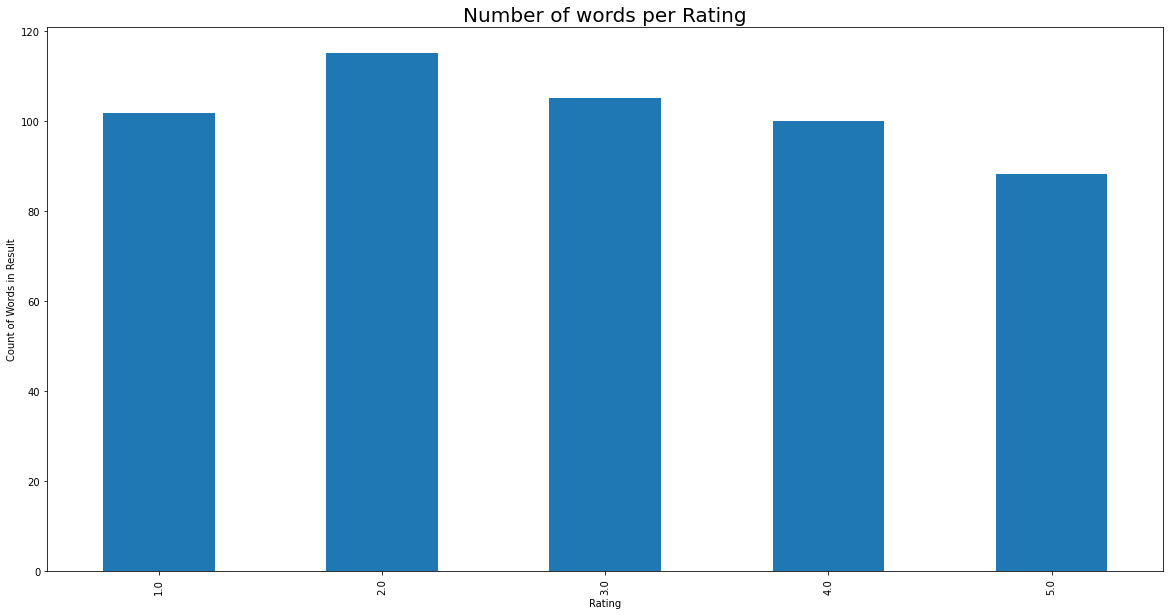

In [44]:
review_content.groupby('Rating')['word_count'].mean().plot(kind='bar',figsize=(20,10))
plt.xlabel('Rating')
plt.ylabel('Count of Words in Result')
plt.title('Number of words per Rating', fontsize=20)
plt.show()

In [45]:
words=review_content['lemmatized_content']
allwords=[]
for wordlist in words:
    allwords+=wordlist
print(allwords)
print('length of all words : ',len(allwords))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [46]:
from nltk.probability import FreqDist
mostcommon=FreqDist(allwords).most_common(100)
#mostcommon

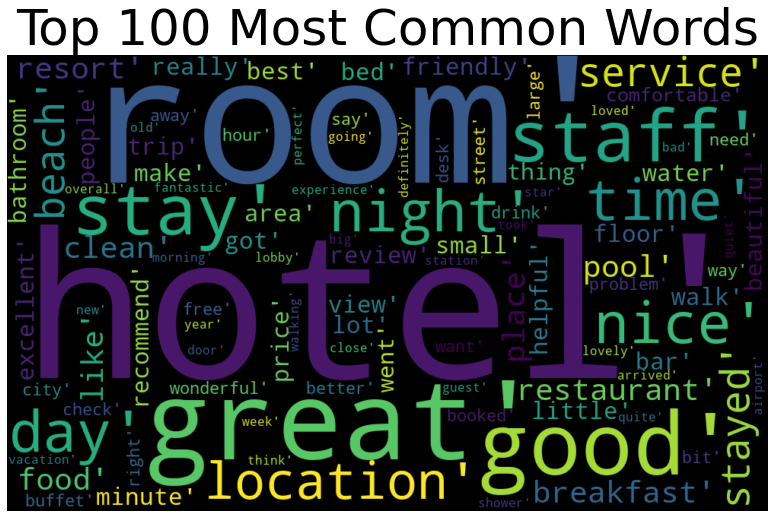

In [47]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=1000, height=600, background_color='black').generate(str(mostcommon))
fig = plt.figure(figsize=(12,7), facecolor='white')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [48]:
from collections import Counter
mostfreq=review_content.groupby('Rating')['cleaned_review'].apply(lambda x : Counter(' '.join(x).split()).most_common(25))
mostfreq

Rating
1.0    [(room, 4294), (hotel, 4002), (stay, 1246), (d...
2.0    [(room, 5772), (hotel, 4657), (night, 1618), (...
3.0    [(room, 6128), (hotel, 5628), (good, 2523), (n...
4.0    [(hotel, 15535), (room, 14238), (great, 7572),...
5.0    [(hotel, 24164), (room, 17314), (great, 10886)...
Name: cleaned_review, dtype: object

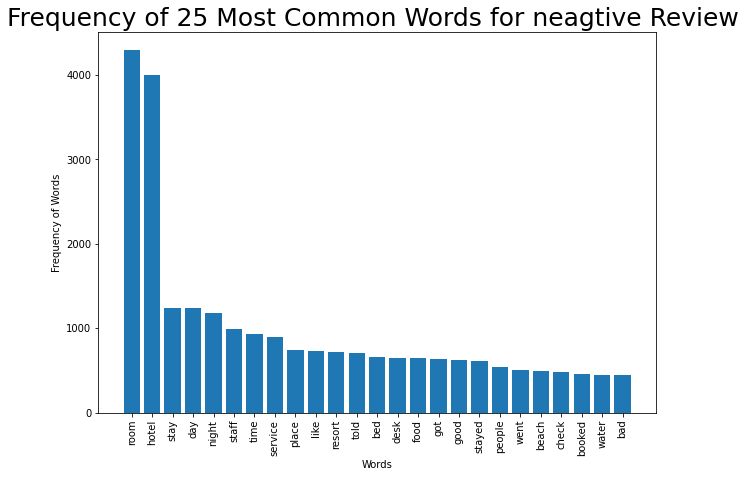

In [49]:
neagtive=mostfreq.iloc[0]
words=list(zip(*neagtive))[0]
freq=list(zip(*neagtive))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for neagtive Review ', fontsize=25)
plt.show()

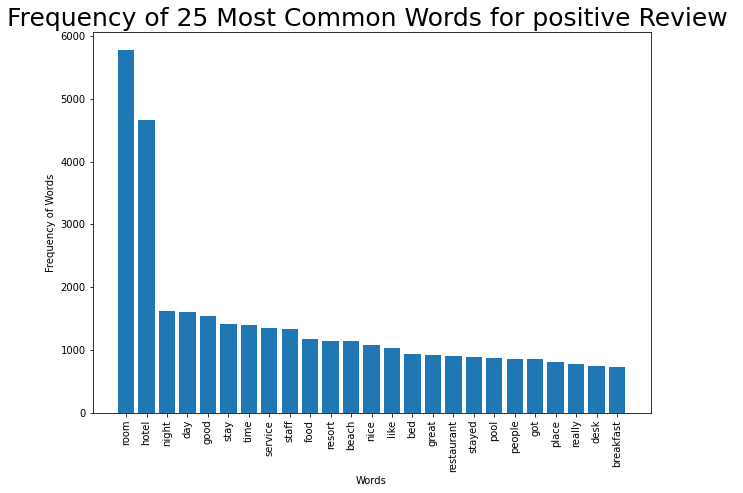

In [50]:
positive=mostfreq.iloc[1]
words=list(zip(*positive))[0]
freq=list(zip(*positive))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for positive Review ', fontsize=25)
plt.show()

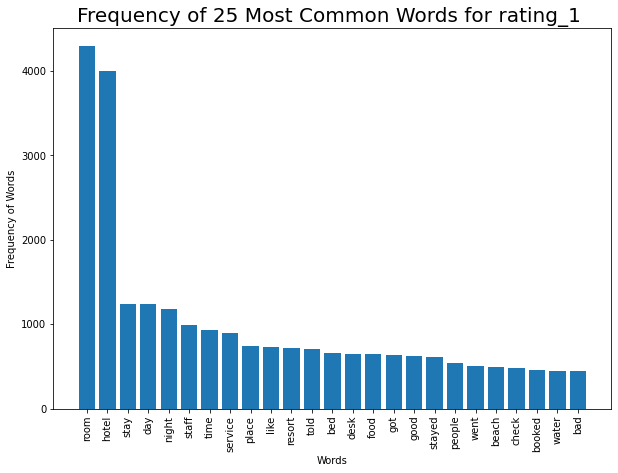

In [51]:
rating_1=mostfreq.iloc[0]
words=list(zip(*rating_1))[0]
freq=list(zip(*rating_1))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_1 ', fontsize=20)
plt.show()

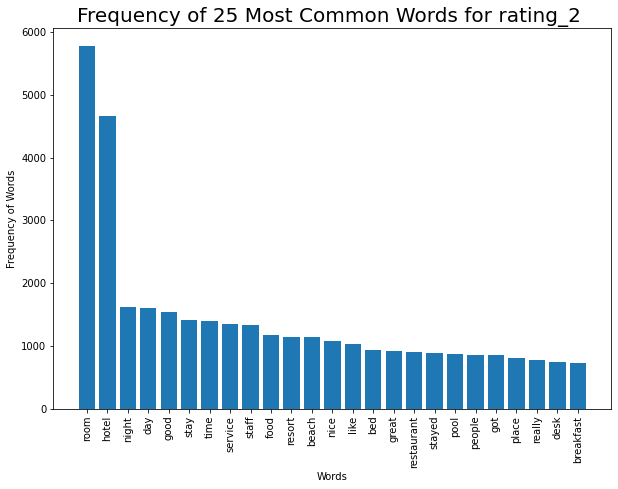

In [52]:
rating_2=mostfreq.iloc[1]
words=list(zip(*rating_2))[0]
freq=list(zip(*rating_2))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_2 ', fontsize=20)
plt.show()

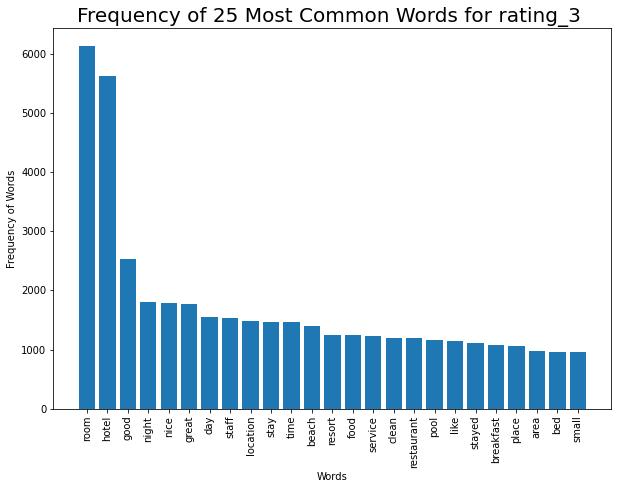

In [53]:
rating_3=mostfreq.iloc[2]
words=list(zip(*rating_3))[0]
freq=list(zip(*rating_3))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_3 ', fontsize=20)
plt.show()

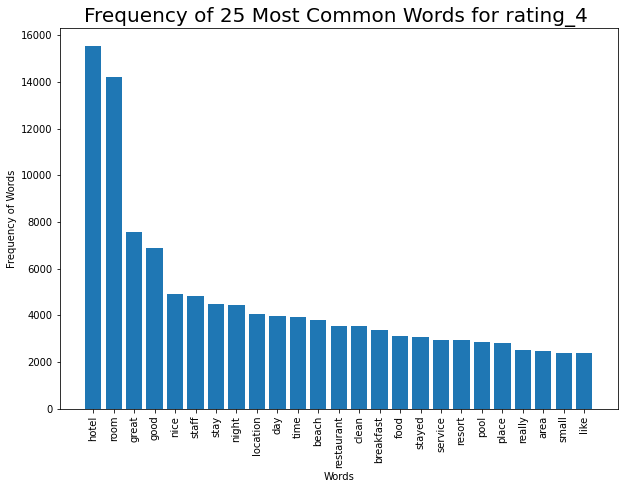

In [54]:
rating_4=mostfreq.iloc[3]
words=list(zip(*rating_4))[0]
freq=list(zip(*rating_4))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_4 ', fontsize=20)
plt.show()

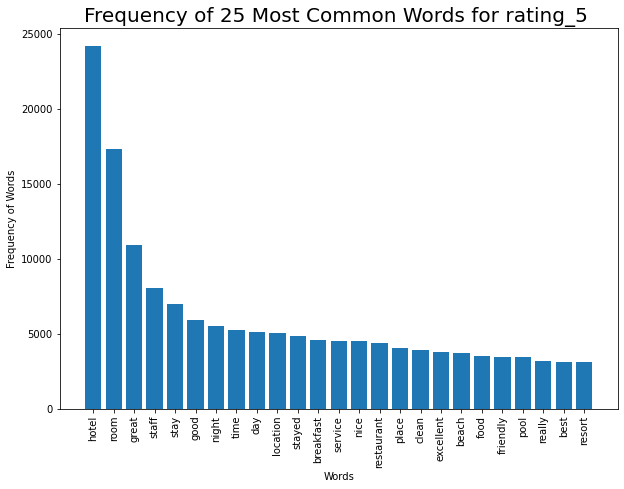

In [55]:
rating_5=mostfreq.iloc[4]
words=list(zip(*rating_5))[0]
freq=list(zip(*rating_5))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_5 ', fontsize=20)
plt.show()

In [56]:
# Vectorizing
# transform the text to numeric data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit(review_content['cleaned_review'])

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [58]:
X_train_tfidf_transform = X_train_tfidf.transform(review_content['cleaned_review'])

In [59]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_transform,review_content['review_segment'],test_size=0.3, random_state=30,shuffle=True)

In [60]:
print(X_train.shape,y_train.shape)
X_test.shape,y_test.shape

(14343, 45604) (14343,)


((6148, 45604), (6148,))

In [61]:
def accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred))  

# Model Builiding

In [62]:
#1) Logistic regression
lg = LogisticRegression()
lg_model = lg.fit(X_train,y_train)
y_train_pred = lg_model.predict(X_train)
y_test_pred = lg_model.predict(X_test)

In [63]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      0.36      0.53       866
    positive       0.96      1.00      0.98     13477

    accuracy                           0.96     14343
   macro avg       0.98      0.68      0.76     14343
weighted avg       0.96      0.96      0.95     14343


 [[  316   550]
 [    1 13476]]

 0.9615840479676497
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.95      0.24      0.38       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.96      0.62      0.68      6148
weighted avg       0.96      0.96      0.95      6148


 [[  78  246]
 [   4 5820]]

 0.9593363695510735


In [64]:
Data_models = pd.DataFrame(columns = ['Model','Train_Accuracy','Test_Accuracy'])

In [65]:
lg_train =accuracy_score(y_train,y_train_pred)
lg_test  =accuracy_score(y_test,y_test_pred)


Data_models.loc[1,'Model'] = 'Logistic Regression'
Data_models.loc[1,"Train_Accuracy"] = lg_train
Data_models.loc[1,"Test_Accuracy"] = lg_test

In [66]:
def get_percentage(num):
    return "{:.2f}".format(num*100)

In [67]:
Data_models["Train_Accuracy"] = Data_models["Train_Accuracy"].apply(get_percentage)
Data_models["Test_Accuracy"]  = Data_models["Test_Accuracy"].apply(get_percentage)
Data_models

,Model,Train_Accuracy,Test_Accuracy
1,Logistic Regression,96.16,95.93


In [68]:
#2) Multinomial Naive Bayes
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

In [69]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       866
    positive       0.94      1.00      0.97     13477

    accuracy                           0.94     14343
   macro avg       0.47      0.50      0.48     14343
weighted avg       0.88      0.94      0.91     14343


 [[    0   866]
 [    0 13477]]

 0.9396221153175766
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       324
    positive       0.95      1.00      0.97      5824

    accuracy                           0.95      6148
   macro avg       0.47      0.50      0.49      6148
weighted avg       0.90      0.95      0.92      6148


 [[   0  324]
 [   0 5824]]

 0.9472999349381913


In [70]:
#3) Random Forest
rf = RandomForestClassifier(max_features=400)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [71]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[  866     0]
 [    0 13477]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.94      0.09      0.16       324
    positive       0.95      1.00      0.98      5824

    accuracy                           0.95      6148
   macro avg       0.94      0.54      0.57      6148
weighted avg       0.95      0.95      0.93      6148


 [[  29  295]
 [   2 5822]]

 0.9516916070266753


In [72]:
#3) Gradiient Boost
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [73]:
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.94      0.51      0.67       866
    positive       0.97      1.00      0.98     13477

    accuracy                           0.97     14343
   macro avg       0.96      0.76      0.82     14343
weighted avg       0.97      0.97      0.96     14343


 [[  445   421]
 [   27 13450]]

 0.9687652513421181
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.80      0.44      0.57       324
    positive       0.97      0.99      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.89      0.72      0.78      6148
weighted avg       0.96      0.96      0.96      6148


 [[ 143  181]
 [  35 5789]]

 0.9648666232921275


In [74]:
# considering lg as the final model

In [75]:
lg.fit(X_train_tfidf_transform, review_content['review_segment']) 

LogisticRegression()

In [76]:
# Final model convert to pickle file and Vectorizering 

In [77]:
import pickle
import requests
import json
import joblib

In [78]:
new_data = ['unique, great stay','great location price view hotel great quick',
           'loved, stayed warwick overnight getway enjoy','pay read reviews booked knew getting']

In [79]:
new_clean_data = list(map(preprocess, new_data))
new_clean_data

['unique great stay',
 'great location price view hotel great quick',
 'loved stayed warwick overnight getway enjoy',
 'pay read review booked knew getting']

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
new_data_tf = tfidf_vect.transform(new_clean_data)
new_data_tf

<4x45604 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [82]:
lg_pred_train_y = lg_model.predict(new_data_tf)
lg_pred_train_y

array(['positive', 'positive', 'positive', 'positive'], dtype=object)

In [95]:
pickle_out = open("lg_model.pkl","wb")
pickle_out=joblib.dump(lg_model,pickle_out)
pickle_out

In [96]:
pickle_out_tfidf = open("vect_tfidf.pkl","wb")
pickle_out_tfidf=joblib.dump(tfidf_vect,pickle_out_tfidf)
pickle_out_tfidf

In [97]:
review_content[['cleaned_review']].head(100)

,cleaned_review
0,nice hotel expensive parking got good deal sta...
1,nothing special charge diamond member hilton d...
2,nice room experience hotel monaco seattle good...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
...,...
95,excellent stay staff friendly helpful nice hot...
96,return going seattle booked hotel knowing budg...
97,terrible hotel approximately week ago april re...
98,great price okay experience stayed inn queen a...


In [98]:
review_content.to_csv('Reviews',encoding = 'utf-8',index = True)

In [99]:
reviewText = "excellent stay delightful surprise stay"

In [100]:
cleanReviewText = preprocess(reviewText)
cleanReviewText

'excellent stay delightful surprise stay'

In [101]:
textTfIDF = tfidf_vect.transform([cleanReviewText])

In [102]:
predictedOutput=lg_model.predict(textTfIDF)
predictedOutput = predictedOutput[0]
predictedOutput

'positive'

In [103]:
prdictionDist = lg_model._predict_proba_lr(textTfIDF)
prdictionDist


array([[0.04219801, 0.95780199]])

In [104]:
from tabulate import tabulate
dfRes = pd.DataFrame(columns=['Negative', 'Positive'])

In [105]:
dfRes.loc[1, 'Negative'] = get_percentage(prdictionDist[0][0])
#dfRes.loc[1, 'Neutral'] = get_percentage(prdictionDist[0][1])
dfRes.loc[1, 'Positive'] = get_percentage(prdictionDist[0][1])

In [106]:
print(tabulate(dfRes, headers=dfRes.columns, tablefmt="fancy_grid", showindex="never"))

╒════════════╤════════════╕
│   Negative │   Positive │
╞════════════╪════════════╡
│       4.22 │      95.78 │
╘════════════╧════════════╛
